In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading data
df = pd.read_excel('/content/EnergyEfficiency_data.xlsx')

In [3]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
df.rename(columns = {'X1':'Relative Compactness', 'X2':'Surface Area', 'X3':'Wall Area', 'X4': 'Roof Area', 'X5': 'Overall Height', 'X6': 'Orientation', 'X7': 'Glazing Area', 'X8': 'Glazing Area Distribution', 'Y1':'Heating Load', 'Y2':'Cooling Load'}, inplace = True)


In [5]:
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [6]:
#detecting missing values
df.isnull().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

In [7]:
#checking for data types
df.dtypes

Relative Compactness         float64
Surface Area                 float64
Wall Area                    float64
Roof Area                    float64
Overall Height               float64
Orientation                    int64
Glazing Area                 float64
Glazing Area Distribution      int64
Heating Load                 float64
Cooling Load                 float64
dtype: object

In [8]:
#checking for outliers
#z-score

from scipy import stats as st

z = np.abs(st.zscore(df))
print(np.where(z>3))



(array([], dtype=int64), array([], dtype=int64))


We don't have any outliers.

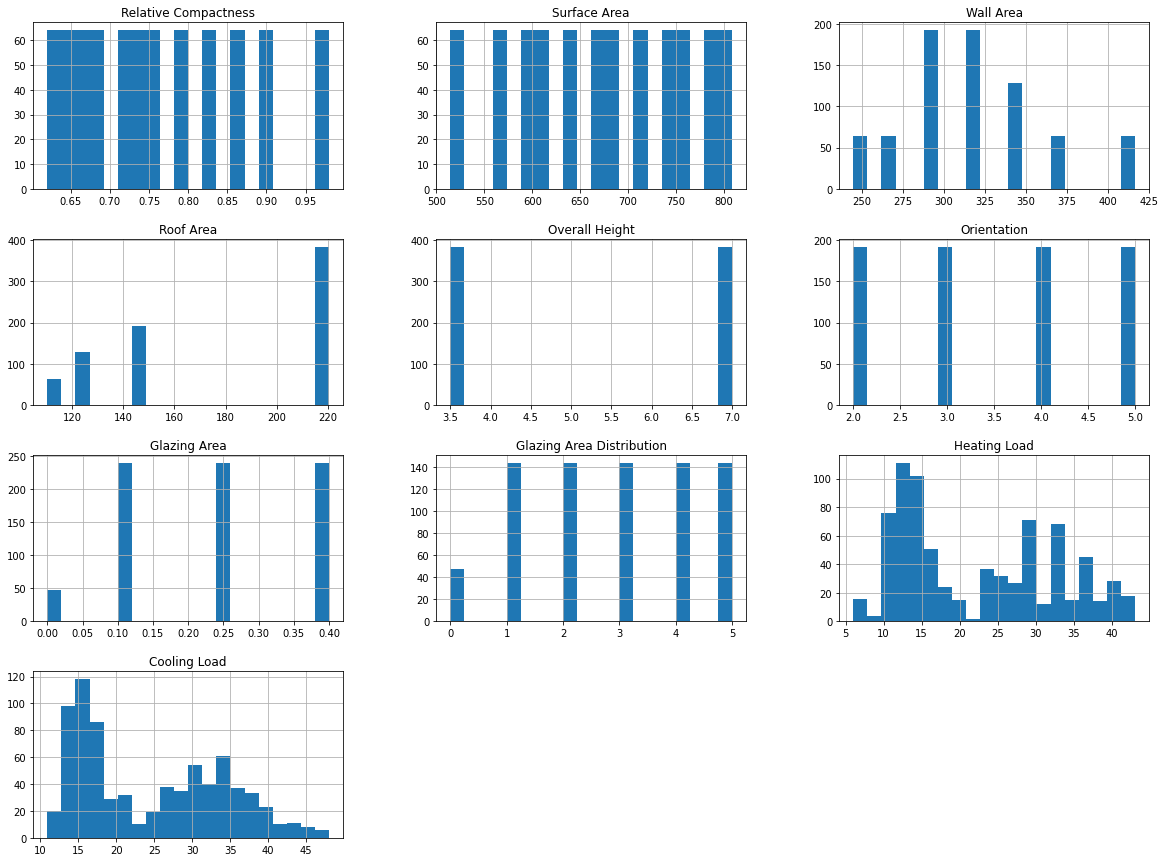

In [9]:
#Now, check the distribution of different variables.

df.hist(bins=20, figsize=(20,15))
plt.show()

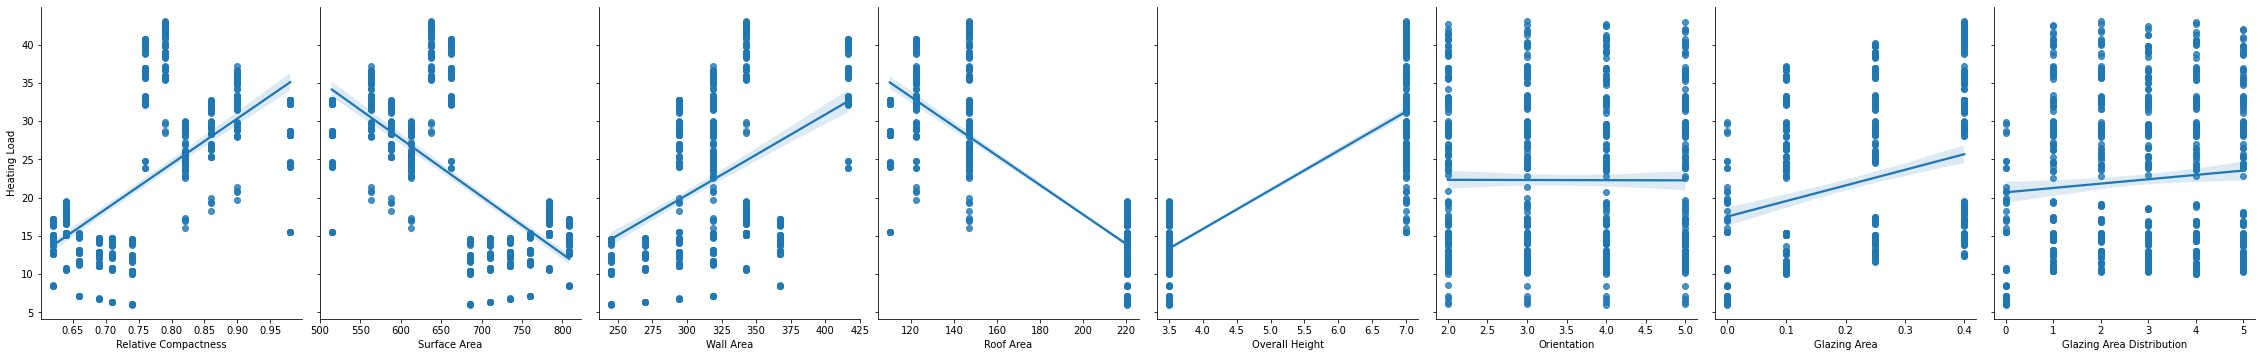

In [10]:
#try to check the correlation between variables.
sns.pairplot(df,x_vars=['Relative Compactness', "Surface Area", 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution'], y_vars=["Heating Load"],
             height=5,aspect=.8, kind="reg")
plt.show()

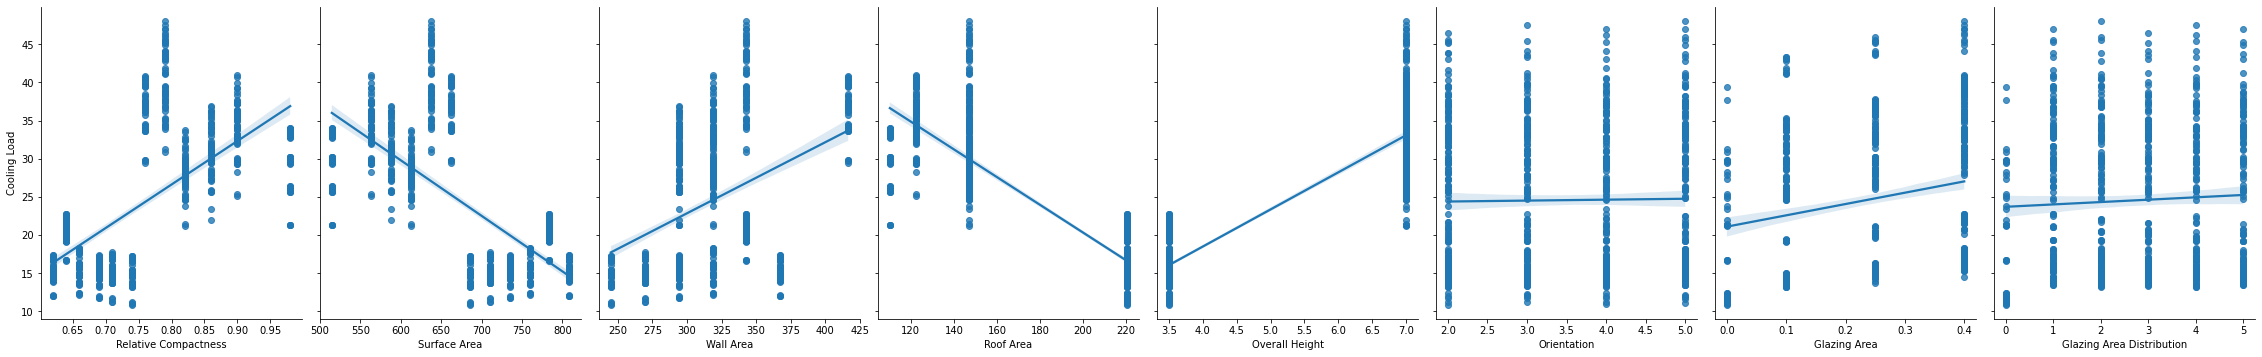

In [11]:
sns.pairplot(df,x_vars=['Relative Compactness', "Surface Area", 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution'], y_vars=["Cooling Load"],
             height=5,aspect=.8, kind="reg")
plt.show()

Not easy to find out a clear correlation, we tried to check the correlation matrix.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [16]:
X = df[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']]
Y =  df[['Heating Load', 'Cooling Load']]
Y1= df[['Heating Load']]
Y2= df[['Cooling Load']]

In [17]:
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, Y1, Y2, test_size=0.33, random_state = 20)


In [18]:
MinMax = MinMaxScaler(feature_range= (0,1))
X_train = MinMax.fit_transform(X_train)
X_test = MinMax.transform(X_test)

In [19]:
Acc = pd.DataFrame(index=None, columns=['model','train_Heating','test_Heating','train_Cooling','test_Cooling'])

In [24]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score

In [23]:
regressors = [['SVR',SVR()],
              
              ['DecisionTreeRegressor',DecisionTreeRegressor()],
              ['KNeighborsRegressor', KNeighborsRegressor()],
              ['RandomForestRegressor', RandomForestRegressor()],
              ['AdaBoostRegressor',AdaBoostRegressor()],
              ['GradientBoostingRegressor',GradientBoostingRegressor()]]


In [25]:
for mod in regressors:
    name = mod[0]
    model = mod[1]
    
    model.fit(X_train,y1_train)
    actr1 = r2_score(y1_train, model.predict(X_train))
    acte1 = r2_score(y1_test, model.predict(X_test))
    
    model.fit(X_train,y2_train)
    actr2 = r2_score(y2_train, model.predict(X_train))
    acte2 = r2_score(y2_test, model.predict(X_test))
    
    Acc = Acc.append(pd.Series({'model':name, 'train_Heating':actr1,'test_Heating':acte1,'train_Cooling':actr2,'test_Cooling':acte2}),ignore_index=True )
Acc.sort_values(by='test_Cooling')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/usr/

,model,train_Heating,test_Heating,train_Cooling,test_Cooling
0,SVR,0.930860,0.910523,0.892760,0.887407
2,KNeighborsRegressor,0.945711,0.904910,0.926867,0.889114
4,AdaBoostRegressor,0.967952,0.965178,0.936048,0.932535
1,DecisionTreeRegressor,1.000000,0.997111,1.000000,0.949789
3,RandomForestRegressor,0.999541,0.997699,0.995565,0.965307
5,GradientBoostingRegressor,0.998144,0.997599,0.979338,0.975855


Decision Tree Regressor parameters turning

In [29]:
DTR = DecisionTreeRegressor()
param_grid = {"criterion": ["mse", "mae"],"min_samples_split": [14, 15, 16, 17],
              "max_depth": [5, 6, 7],"min_samples_leaf": [4, 5, 6],"max_leaf_nodes": [29, 30, 31, 32],}

grid_cv_DTR = GridSearchCV(DTR, param_grid, cv=5)

grid_cv_DTR.fit(X_train,y2_train)
print("R-Squared::{}".format(grid_cv_DTR.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_DTR.best_params_))

R-Squared::0.9599150110108299
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 6, 'max_leaf_nodes': 32, 'min_samples_leaf': 5, 'min_samples_split': 17}


Random Forests Parameters

In [30]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [350, 400, 450], 'max_features': [1, 2], 'max_depth': [85, 90, 95]}]

RFR = RandomForestRegressor(n_jobs=-1)
grid_search_RFR = GridSearchCV(RFR, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_RFR.fit(X_train, y2_train)

print("R-Squared::{}".format(grid_search_RFR.best_score_))
print("Best Hyperparameters::\n{}".format(grid_search_RFR.best_params_))

R-Squared::-2.6561666426231754
Best Hyperparameters::
{'max_depth': 85, 'max_features': 1, 'n_estimators': 450}


In [31]:
RFR = RandomForestRegressor(n_estimators = 450, max_features = 1, max_depth= 90, bootstrap= True)

RFR.fit(X_train,y1_train)
print("R-Squared on train dataset={}".format(RFR.score(X_test,y1_test)))

RFR.fit(X_train,y2_train)   
print("R-Squaredon test dataset={}".format(RFR.score(X_test,y2_test)))

R-Squared on train dataset=0.9918102456458663
R-Squaredon test dataset=0.9742303619558683


Gradient Boosting Regression - Hyperparameter Tuning

In [32]:
param_grid = [{"learning_rate": [0.01, 0.02, 0.1], "n_estimators":[150, 200, 250], "max_depth": [4, 5, 6], 
 "min_samples_split":[1, 2, 3], "min_samples_leaf":[2, 3], "subsample":[1.0, 2.0]}]

GBR = GradientBoostingRegressor()
grid_search_GBR = GridSearchCV(GBR, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_GBR.fit(X_train, y2_train)

print("R-Squared::{}".format(grid_search_GBR.best_score_))
print("Best Hyperparameters::\n{}".format(grid_search_GBR.best_params_))

R-Squared::-1.046391575974403
Best Hyperparameters::
{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 250, 'subsample': 1.0}


In [33]:
GBR = GradientBoostingRegressor(learning_rate=0.1,n_estimators=250, max_depth=5, min_samples_split=3, min_samples_leaf=2, subsample=1.0)

GBR.fit(X_train,y1_train)
print("R-Squared on train dataset={}".format(GBR.score(X_test,y1_test)))

GBR.fit(X_train,y2_train)   
print("R-Squaredon test dataset={}".format(GBR.score(X_test,y2_test)))

R-Squared on train dataset=0.9988782312514055
R-Squaredon test dataset=0.992736839502997


Now, it's time to summary all our BEST models

In [34]:
Acc1 = pd.DataFrame(index=None, columns=['model','train_Heating','test_Heating','train_Cooling','test_Cooling'])

In [35]:
regressors1 = [['DecisionTreeRegressor',DecisionTreeRegressor(criterion= 'mse', max_depth= 6, max_leaf_nodes= 30, min_samples_leaf= 5, min_samples_split= 17)],
              ['RandomForestRegressor', RandomForestRegressor(n_estimators = 450, max_features = 1, max_depth= 90, bootstrap= True)],
              ['GradientBoostingRegressor',GradientBoostingRegressor(learning_rate=0.1,n_estimators=250, max_depth=5, min_samples_split=2, min_samples_leaf=3, subsample=1.0)]]

In [36]:
for mod in regressors1:
    name = mod[0]
    model = mod[1]
    
    model.fit(X_train,y1_train)
    actr1 = r2_score(y1_train, model.predict(X_train))
    acte1 = r2_score(y1_test, model.predict(X_test))
    
    model.fit(X_train,y2_train)
    actr2 = r2_score(y2_train, model.predict(X_train))
    acte2 = r2_score(y2_test, model.predict(X_test))
    
    Acc1 = Acc1.append(pd.Series({'model':name, 'train_Heating':actr1,'test_Heating':acte1,'train_Cooling':actr2,'test_Cooling':acte2}),ignore_index=True )
Acc1.sort_values(by='test_Cooling')

,model,train_Heating,test_Heating,train_Cooling,test_Cooling
0,DecisionTreeRegressor,0.994803,0.995168,0.967655,0.959112
1,RandomForestRegressor,0.998852,0.992309,0.996342,0.974332
2,GradientBoostingRegressor,0.999745,0.998328,0.999009,0.990733


 Building energy performance has been investigated using different models to predict Heating and Cooling loads• We tried to learn how to tune different parameters in the models and obtained a very good prediction result.